In [151]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [152]:
originalImage = cv2.imread("../photos/Rose-1024x1024.tif", cv2.IMREAD_GRAYSCALE)
originalImage = cv2.resize(originalImage, (512, 512))

In [153]:
# Power-law Transform for gamma: T(r) = c * r^gamma

def powerLawTransform(image, gamma):
    if gamma < 0:
        c = 255 / np.max(image) ** -gamma 
    else:
        c = 1

    return c * image ** gamma

In [154]:
# Logarithmic Transform: T(r) = c * log(1 + r)
def logTransform(image):
    c = 255 / np.log(1 + np.max(image))
    
    return c * np.log1p(image) # T(x)=c * log(1+x)

In [155]:
# Inverse Logarithmic Transform: T(r) = c * (exp(r) - 1)
def inverseLogTransform(image):
    c = 255 / (np.exp(1) - 1) 

    return c * np.expm1(image / 255) #T^−1 (x) = c * exp(x)−1

Text(0.5, 1.0, 'Inverse Log Transform Image')

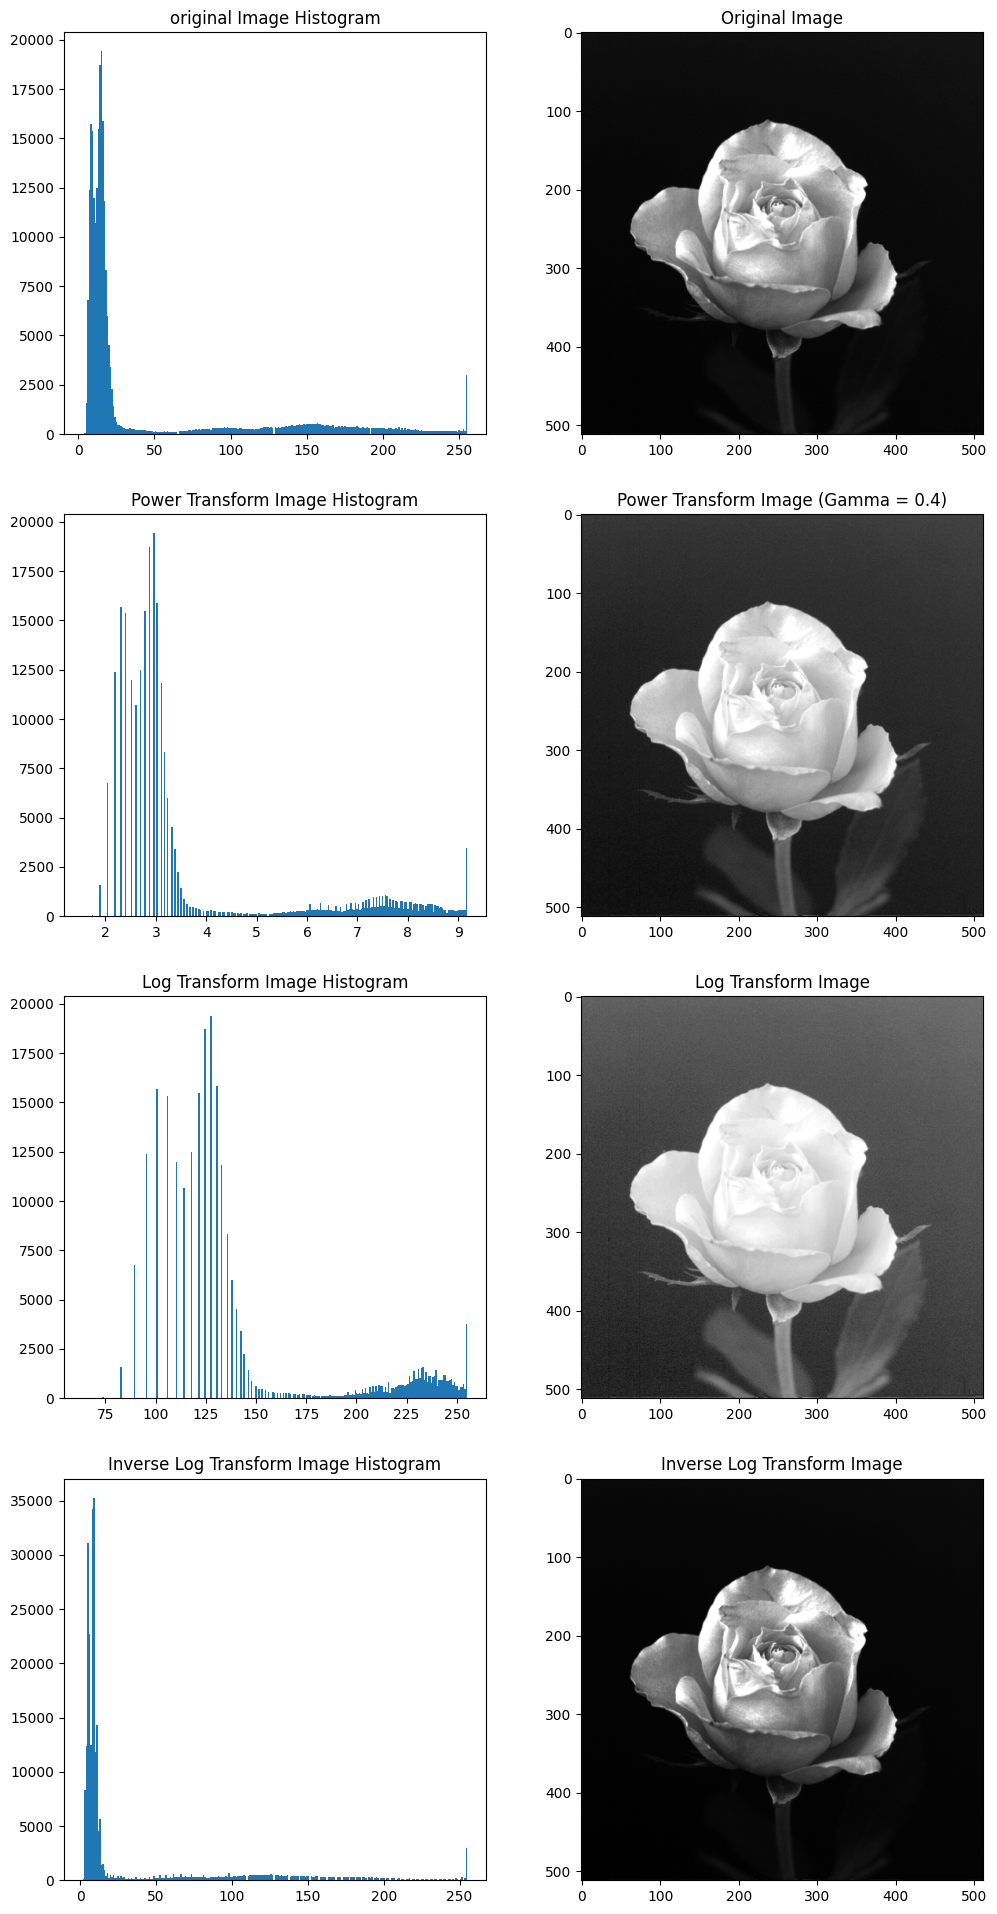

In [156]:
plt.figure(figsize=(12, 24))

plt.subplot(4, 2, 1)
plt.hist(originalImage.ravel(), 256)
plt.title(f"original Image Histogram")

plt.subplot(4, 2, 2)
plt.imshow(originalImage, cmap='gray')
plt.title(f"Original Image")

powerLawTransformedImage = powerLawTransform(originalImage, 0.4)
plt.subplot(4, 2, 3)
plt.hist(powerLawTransformedImage.ravel(), 256)
plt.title(f"Power Transform Image Histogram")

plt.subplot(4, 2, 4)
plt.imshow(powerLawTransformedImage, cmap='gray')
plt.title(f"Power Transform Image (Gamma = 0.4)")

logTransformedImage = logTransform(originalImage)
plt.subplot(4, 2, 5)
plt.hist(logTransformedImage.ravel(), 256)
plt.title(f"Log Transform Image Histogram")

plt.subplot(4, 2, 6)
plt.imshow(logTransformedImage, cmap='gray')
plt.title(f"Log Transform Image")

inverseLogTransformedImage = inverseLogTransform(originalImage)
plt.subplot(4, 2, 7)
plt.hist(inverseLogTransformedImage.ravel(), 256)
plt.title(f"Inverse Log Transform Image Histogram")

plt.subplot(4, 2, 8)
plt.imshow(inverseLogTransformedImage, cmap='gray')
plt.title(f"Inverse Log Transform Image")